# Learn simple machine learning with [Scikit-learn](https://scikit-learn.org/stable/tutorial/index.html) library

>Scikit learn is an open source library used to perform machine learning in python. It provides a range of supervised and unsupervised learning algorithms which contains simple and efficient tools for data analysis and mining purposes.

For more information about 

In order to install the lastest scikit learn library, using `pip`
> Windows, macOS, Linux: `$ pip install -U scikit-learn`




In [9]:
!pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 1.5MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


## Machine learning Summary
Machine learning is a subset of AI that allows 
> 1. train: a computer learn some algorithm from the data to build a model

> 2. test: using the model learned from training process predict new data.

> In general, a learning problem considers a set of *n* samples of data (`training set`) and then tries to predict properties of unknown data (`testing set`).

###Machine learning sub-categories

1. Supervised learning: 
2. Unsupervised learning
3. Reinforcement learning

## Loading an example dataset

>Scikit learn provides a few standard datasets, for instance the `iris` and `digits` datasets fro classification and the `boston house prices` dataset for regression. 

> A dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the `.data` member, which is a 2D array with (*`n_samples`*, *`n_features`*). 

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, svm, metrics
# Split data into train and test subsets
from sklearn.model_selection import train_test_split

In [11]:
iris = datasets.load_iris()
data = iris.data
print(data.shape, type(data))

(150, 4) <class 'numpy.ndarray'>


In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

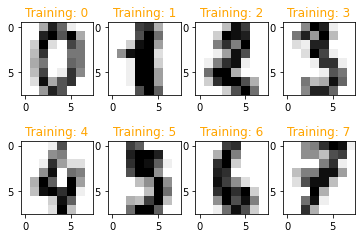

In [14]:
digits = datasets.load_digits()

# Join the images and target labels in a list
images_and_labels = list(zip(digits.images, digits.target))
 
# for every element in the list
for index, (image, label) in enumerate(images_and_labels[:8]):
    # initialize a subplot of 2X4 at the i+1-th position
    plt.subplot(2, 4, index+1)
    # Display images in all subplots
    plt.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest')
    # Add a title to each subplot
    plt.title('Training: ' + str(label), color = 'orange')
 
# Show the plot
plt.show()

## Learning and predicting 

>Scikit learn provides dozens of built-in machine leraning algorithms and models called `estimator`; classfication, regression or clustering algorithm or a *transformer* that extracts or filters useful features from raw data. 

> Each `estimator` can be fitted to some data using its `fit` method and predict the classes of testing data using `predict` method.

#### Classification example (SVC)



Simple classcification example with SVC. 
For more details, https://scikit-learn.org/stable/modules/svm.html#svm-classification

In [15]:
# Define estimator: Support Vector Classification (SVC) 
clf = svm.SVC()
clf

SVC()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, shuffle=False)

In [17]:
print(len(X_train), len(X_test))

1437 360


In [18]:
# learn the digits on the training sample data using 'fit' method of estimator.
clf.fit(X_train, y_train)

SVC()

In [19]:
# predict the test sample data
predicted = clf.predict(X_test)
print(metrics.accuracy_score(y_test, predicted))

0.9416666666666667


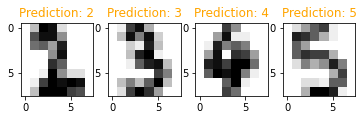

In [20]:
images_and_predictions = list(zip(digits.images[len(X_train):], predicted))
len(images_and_predictions)

# for every element in the list
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    # initialize a subplot of 2X4 at the i+1-th position
    plt.subplot(2, 4, index + 1)
    # Display images in all subplots
    plt.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest')
    # Add a title to each subplot
    plt.title('Prediction: %i' % prediction, color='orange')

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       0.96      0.73      0.83        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.92      0.97      0.95        36
           8       0.78      0.94      0.85        33
           9       0.92      0.89      0.90        37

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.95      0.94      0.94       360


Confusion matrix:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 27  0  2  0  2  6  0]
 [ 0  0  0  0 34  0  0  0  1  2]
 [ 0  0  0  0

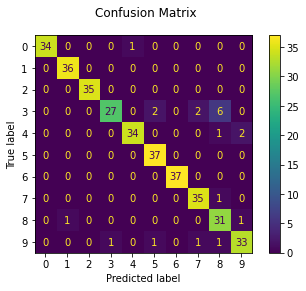

In [21]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

source: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

## Lab assignment

Write a basic ML program to predict the median house value of california_housing_train dataset from scikit-learn using any model from scikit-learn or keras.
In this assignment, you should include the following steps.
- 	Acquire the dataset from sklearn.datasets.fetch_california_housing()
- 	Visualize the data to understand it better. Show the summary of data.
- 	Pre-process the data including replace any missing values and remove any duplicated values. Also, you can apply some normalization process to each column of dataset.
- 	Split the data into 2 groups: training (80%) and test (20%).
- 	Choose any model from scikit-learn or keras and explain why you choose the model.
- 	Train your training data with cross-validation using sklearn.model_selection.KFold.
- 	Show the result of your model and explain your result


In [22]:
housing = datasets.fetch_california_housing()
data = housing.data
features = housing.feature_names
target = housing.target
print(features)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [28]:
len(set(target))

3842

In [27]:
outcome = [int(x) for x in target]
df = pd.DataFrame(outcome, columns=['o'])
outcomes = df.groupby('o')
[{k: values.shape} for k, values in outcomes]

[{0: (3596, 1)},
 {1: (8289, 1)},
 {2: (4889, 1)},
 {3: (2095, 1)},
 {4: (779, 1)},
 {5: (992, 1)}]

In [37]:
train_df = pd.DataFrame(data, columns=features)
train_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


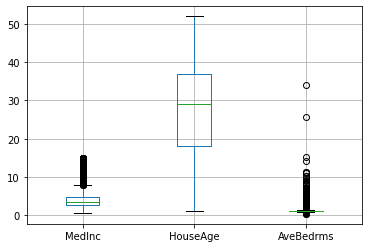

In [47]:
boxplot = train_df.boxplot(column=['MedInc', 'HouseAge', 'AveBedrms'])

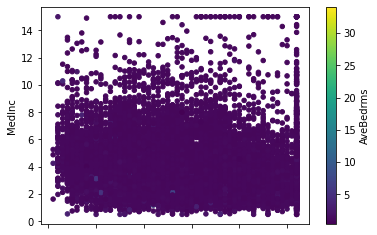

In [50]:
ax1 = train_df.plot.scatter(x='HouseAge',
                      y='MedInc',
                      c='AveBedrms',
                      colormap='viridis')

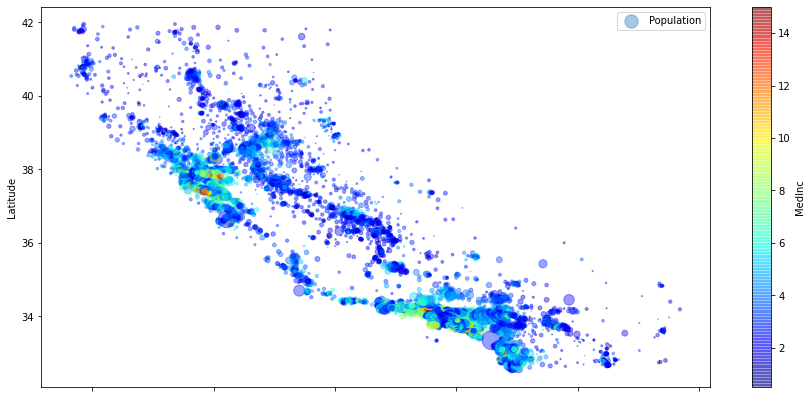

In [30]:
housing = train_df.copy()
housing.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
            s=housing["Population"]/100, label="Population",
            c="MedInc", cmap=plt.get_cmap("jet"), colorbar=True,
            figsize=(15,7))

#### Pre-process the data 

In [ ]:
train_df[train_df.columns] = train_df[train_df.columns].apply(pd.to_numeric, errors='coerce')
train_df = train_df.fillna(train_df.median())

#### training process

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    train_df, target, test_size=0.2, shuffle=True)

In [ ]:
print(len(X_train), X_train.shape, len(y_train), X_test.shape, len(X_test))

16512 (16512, 8) 16512 (4128, 8) 4128


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ 4.50092717e-01  9.51833320e-03 -1.24112787e-01  7.97000381e-01
 -3.01912623e-06 -4.12953758e-03 -4.21932933e-01 -4.36249620e-01]
Mean squared error: 0.54
Coefficient of determination: 0.593204


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import explained_variance_score, mean_squared_error

regr = LinearRegression()
k_fold = KFold(10)

for k, (train, validate) in enumerate(k_fold.split(X_train, y_train)):
  regr.fit(X_train.iloc[train], y_train[train])
  X_validation = X_train.iloc[validate]
  y_validation = y_train[validate]
  y_pred = regr.predict(X_validation)
  print("[fold %d] score: %f"%(k, regr.score(X_train.iloc[validate], y_train[validate])))
  print("Explained Variance Score: %f, MSE: %f"%(explained_variance_score(y_validation, y_pred), mean_squared_error(y_validation, y_pred)))


[fold 0] score: 0.561330
Explained Variance Score: 0.633368, MSE: 0.427763
[fold 1] score: -0.606903
Explained Variance Score: -0.046785, MSE: 0.477641
[fold 2] score: 0.171647
Explained Variance Score: 0.222362, MSE: 1.024517
[fold 3] score: 0.541180
Explained Variance Score: 0.564354, MSE: 0.696171
[fold 4] score: 0.397153
Explained Variance Score: 0.468101, MSE: 0.369277
[fold 5] score: 0.561361
Explained Variance Score: 0.593025, MSE: 0.842456
[fold 6] score: 0.486808
Explained Variance Score: 0.496828, MSE: 0.535621
[fold 7] score: 0.346747
Explained Variance Score: 0.358487, MSE: 0.352871
[fold 8] score: 0.514455
Explained Variance Score: 0.560618, MSE: 0.417491
[fold 9] score: 0.429907
Explained Variance Score: 0.455458, MSE: 0.835812


In [ ]:

regr.score(X_test, y_test)

0.6542170755295336

For more details about scikit learn, https://scikit-learn.org/stable/index.html